In [88]:
import pandas as pd
import numpy as np
import os


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

os.getcwd()

'/Users/murat/Library/CloudStorage/OneDrive-UniversityofRochester/UR_Projects/CampaignContribution_Winner_Kaggle'

In [89]:
train = pd.read_csv("training_data.csv")


/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_1190/3473200358.py:1: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("training_data.csv")


In [90]:

cat_vars = ['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type']
num_vars = ['winner_ratio', 'candidacy_count',
       'candidacy_democratic_count', 'candidacy_republican_count',
       'contribution_count', 'contribution_democratic_count',
       'contribution_republican_count', 'politician_challenger_count',
       'politician_count', 'politician_democratic_count',
       'politician_incumbency_count', 'politician_open_pos_count',
       'politician_republican_count', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_challenger_ratio',
       'politician_democratic_ratio', 'politician_incumbency_ratio',
       'politician_open_pos_ratio', 'politician_republican_ratio',
       'senate_contribution_ratio', 'us_house_contribution_ratio',
       'us_senate_contribution_ratio', 'contrib_state_deg',
       'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       'state_win_comm']

In [91]:
train.columns

Index(['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type', 'winner_ratio', 'candidacy_count',
       'candidacy_democratic_count', 'candidacy_republican_count',
       'contribution_count', 'contribution_democratic_count',
       'contribution_republican_count', 'politician_challenger_count',
       'politician_count', 'politician_democratic_count',
       'politician_incumbency_count', 'politician_open_pos_count',
       'politician_republican_count', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_rat

### Data Clean up: 
Correct Types, Check/remove Missing, Check/remove Duplicates

In [92]:
#convert columns of train that are listed in numerical_variables to numeric:
for col in num_vars:
    if col in train.columns:
        train[col] = pd.to_numeric(train[col], errors='coerce')
#convert columns of train that are listed in categorical_variables to categorical:

In [93]:
# 3. Check for missing values
print('Size of the train data:',train.shape)
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in the dataset:")
print(missing_values)

Size of the train data: (172848, 41)
Missing values in the dataset:
city                                     1468
zip_code                                 3929
governor_contribution_ratio               193
house_and_assembly_contribution_ratio     192
senate_contribution_ratio                 193
us_house_contribution_ratio               192
us_senate_contribution_ratio              193
dtype: int64


In [94]:
#Removing lines with missing values:
train.dropna(inplace=True)
# 4. Check for duplicates
duplicates = train.duplicated().sum()
print("Duplicates in the dataset:", duplicates)

#Remove duplicates
train.drop_duplicates(inplace=True)

Duplicates in the dataset: 2192


In [95]:
import pandas as pd

# Temporarily show all columns for describe output
with pd.option_context('display.max_columns', None):
    display(train.describe())

,zip_code,winner_ratio,candidacy_count,candidacy_democratic_count,candidacy_republican_count,contribution_count,contribution_democratic_count,contribution_republican_count,politician_challenger_count,politician_count,politician_democratic_count,politician_incumbency_count,politician_open_pos_count,politician_republican_count,contribution_democratic_sum_2010_usd,contribution_republican_sum_2010_usd,contribution_sum_2010_usd,governor_contributions_sum_2010_usd,house_and_assembly_contributions_sum_2010_usd,senate_contributions_sum_2010_usd,us_house_contributions_sum_2010_usd,us_senate_contributions_sum_2010_usd,candidacy_democratic_ratio,candidacy_republican_ratio,contribution_democratic_count_ratio,contribution_republican_count_ratio,governor_contribution_ratio,house_and_assembly_contribution_ratio,politician_challenger_ratio,politician_democratic_ratio,politician_incumbency_ratio,politician_open_pos_ratio,politician_republican_ratio,senate_contribution_ratio,us_house_contribution_ratio,us_senate_contribution_ratio
count,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000
mean,39024.489699,0.594162,6.176805,3.335922,2.840883,9.895191,5.466083,4.429109,0.713137,5.125878,2.790437,2.507988,1.828703,2.335442,4.352812e+03,4.908672e+03,9.261483e+03,1.510798e+03,1.625962e+03,1.162175e+03,2.940238e+03,1.263451e+03,0.556006,0.443994,0.556252,0.443748,0.258518,0.252494,0.159855,0.556139,0.391814,0.427220,0.443861,0.161418,0.121688,0.085453
std,28760.187022,0.407922,25.969141,14.217441,15.054820,94.246271,31.486817,83.029806,2.022104,15.343861,8.552393,11.275683,4.204532,9.247521,8.405754e+04,2.668723e+05,2.839546e+05,1.192158e+05,8.482449e+04,4.544781e+04,7.107880e+04,2.871951e+04,0.467408,0.467408,0.468618,0.468618,0.404824,0.398502,0.302718,0.466829,0.406189,0.411307,0.466829,0.339712,0.435256,0.401273
min,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-3.107367e+05,-3.674252e+05,-3.674252e+05,-2.440000e+04,-1.028403e+05,-3.790261e+05,-3.107367e+05,-2.376295e+04,0.000000,0.000000,0.000000,0.000000,-23.380614,-6.118411,0.000000,0.000000,0.000000,0.000000,0.000000,-29.388715,-6.448457,-92.603744
25%,19534.750000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,3.208500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30523.000000,0.666667,2.000000,2.000000,1.000000,4.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.400000e+02,4.466000e+01,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.800000,0.200000,0.833333,0.166667,0.000000,0.000000,0.000000,0.800000,0.333333,0.333333,0.200000,0.000000,0.000000,0.000000
75%,63102.000000,1.000000,4.000000,3.000000,2.000000,7.000000,4.000000,3.000000,1.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.314455e+03,1.013020e+03,2.845180e+03,3.076775e+02,2.704200e+02,1.000000e+02,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,0.520489,0.466856,0.200000,1.000000,0.785714,1.000000,1.000000,0.118383,0.000000,0.000000
max,99999.000000,1.000000,2026.000000,1284.000000,1014.000000,31652.000000,3990.000000,31648.000000,140.000000,829.000000,543.000000,608.000000,296.000000,584.000000,1.468935e+07,9.500888e+07,9.503992e+07,4.472358e+07,2.229992e+07,1.375416e+07,1.220771e+07,6.78302

In [96]:
cols_with_negatives = ['contribution_democratic_sum_2010_usd','contribution_republican_sum_2010_usd','contribution_sum_2010_usd','governor_contributions_sum_2010_usd',
'house_and_assembly_contributions_sum_2010_usd','senate_contributions_sum_2010_usd','us_house_contributions_sum_2010_usd',
'us_senate_contributions_sum_2010_usd','governor_contribution_ratio','house_and_assembly_contribution_ratio','senate_contribution_ratio',
'us_house_contribution_ratio','us_senate_contribution_ratio']

train[cols_with_negatives].describe()


,contribution_democratic_sum_2010_usd,contribution_republican_sum_2010_usd,contribution_sum_2010_usd,governor_contributions_sum_2010_usd,house_and_assembly_contributions_sum_2010_usd,senate_contributions_sum_2010_usd,us_house_contributions_sum_2010_usd,us_senate_contributions_sum_2010_usd,governor_contribution_ratio,house_and_assembly_contribution_ratio,senate_contribution_ratio,us_house_contribution_ratio,us_senate_contribution_ratio
count,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000
mean,4.352812e+03,4.908672e+03,9.261483e+03,1.510798e+03,1.625962e+03,1.162175e+03,2.940238e+03,1.263451e+03,0.258518,0.252494,0.161418,0.121688,0.085453
std,8.405754e+04,2.668723e+05,2.839546e+05,1.192158e+05,8.482449e+04,4.544781e+04,7.107880e+04,2.871951e+04,0.404824,0.398502,0.339712,0.435256,0.401273
min,-3.107367e+05,-3.674252e+05,-3.674252e+05,-2.440000e+04,-1.028403e+05,-3.790261e+05,-3.107367e+05,-2.376295e+04,-23.380614,-6.118411,-29.388715,-6.448457,-92.603744
25%,0.000000e+00,0.000000e+00,3.208500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.400000e+02,4.466000e+01,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.314455e+03,1.013020e+03,2.845180e+03,3.076775e+02,2.704200e+02,1.000000e+02,0.000000e+00,0.000000e+00,0.520489,0.466856,0.118383,0.000000,0.000000
max,1.468935e+07,9.500888e+07,9.503992e+07,4.472358e+07,2.229992e+07,1.375416e+07,1.220771e+07,6.783020e+06,3.348887,30.388715,24.380614,93.603744,7.448457


In [97]:
# ### Treat these descrepent columns
# for col in cols_with_negatives:
#     train[col] = train[col].clip(lower=0)


### Distribution Plot:

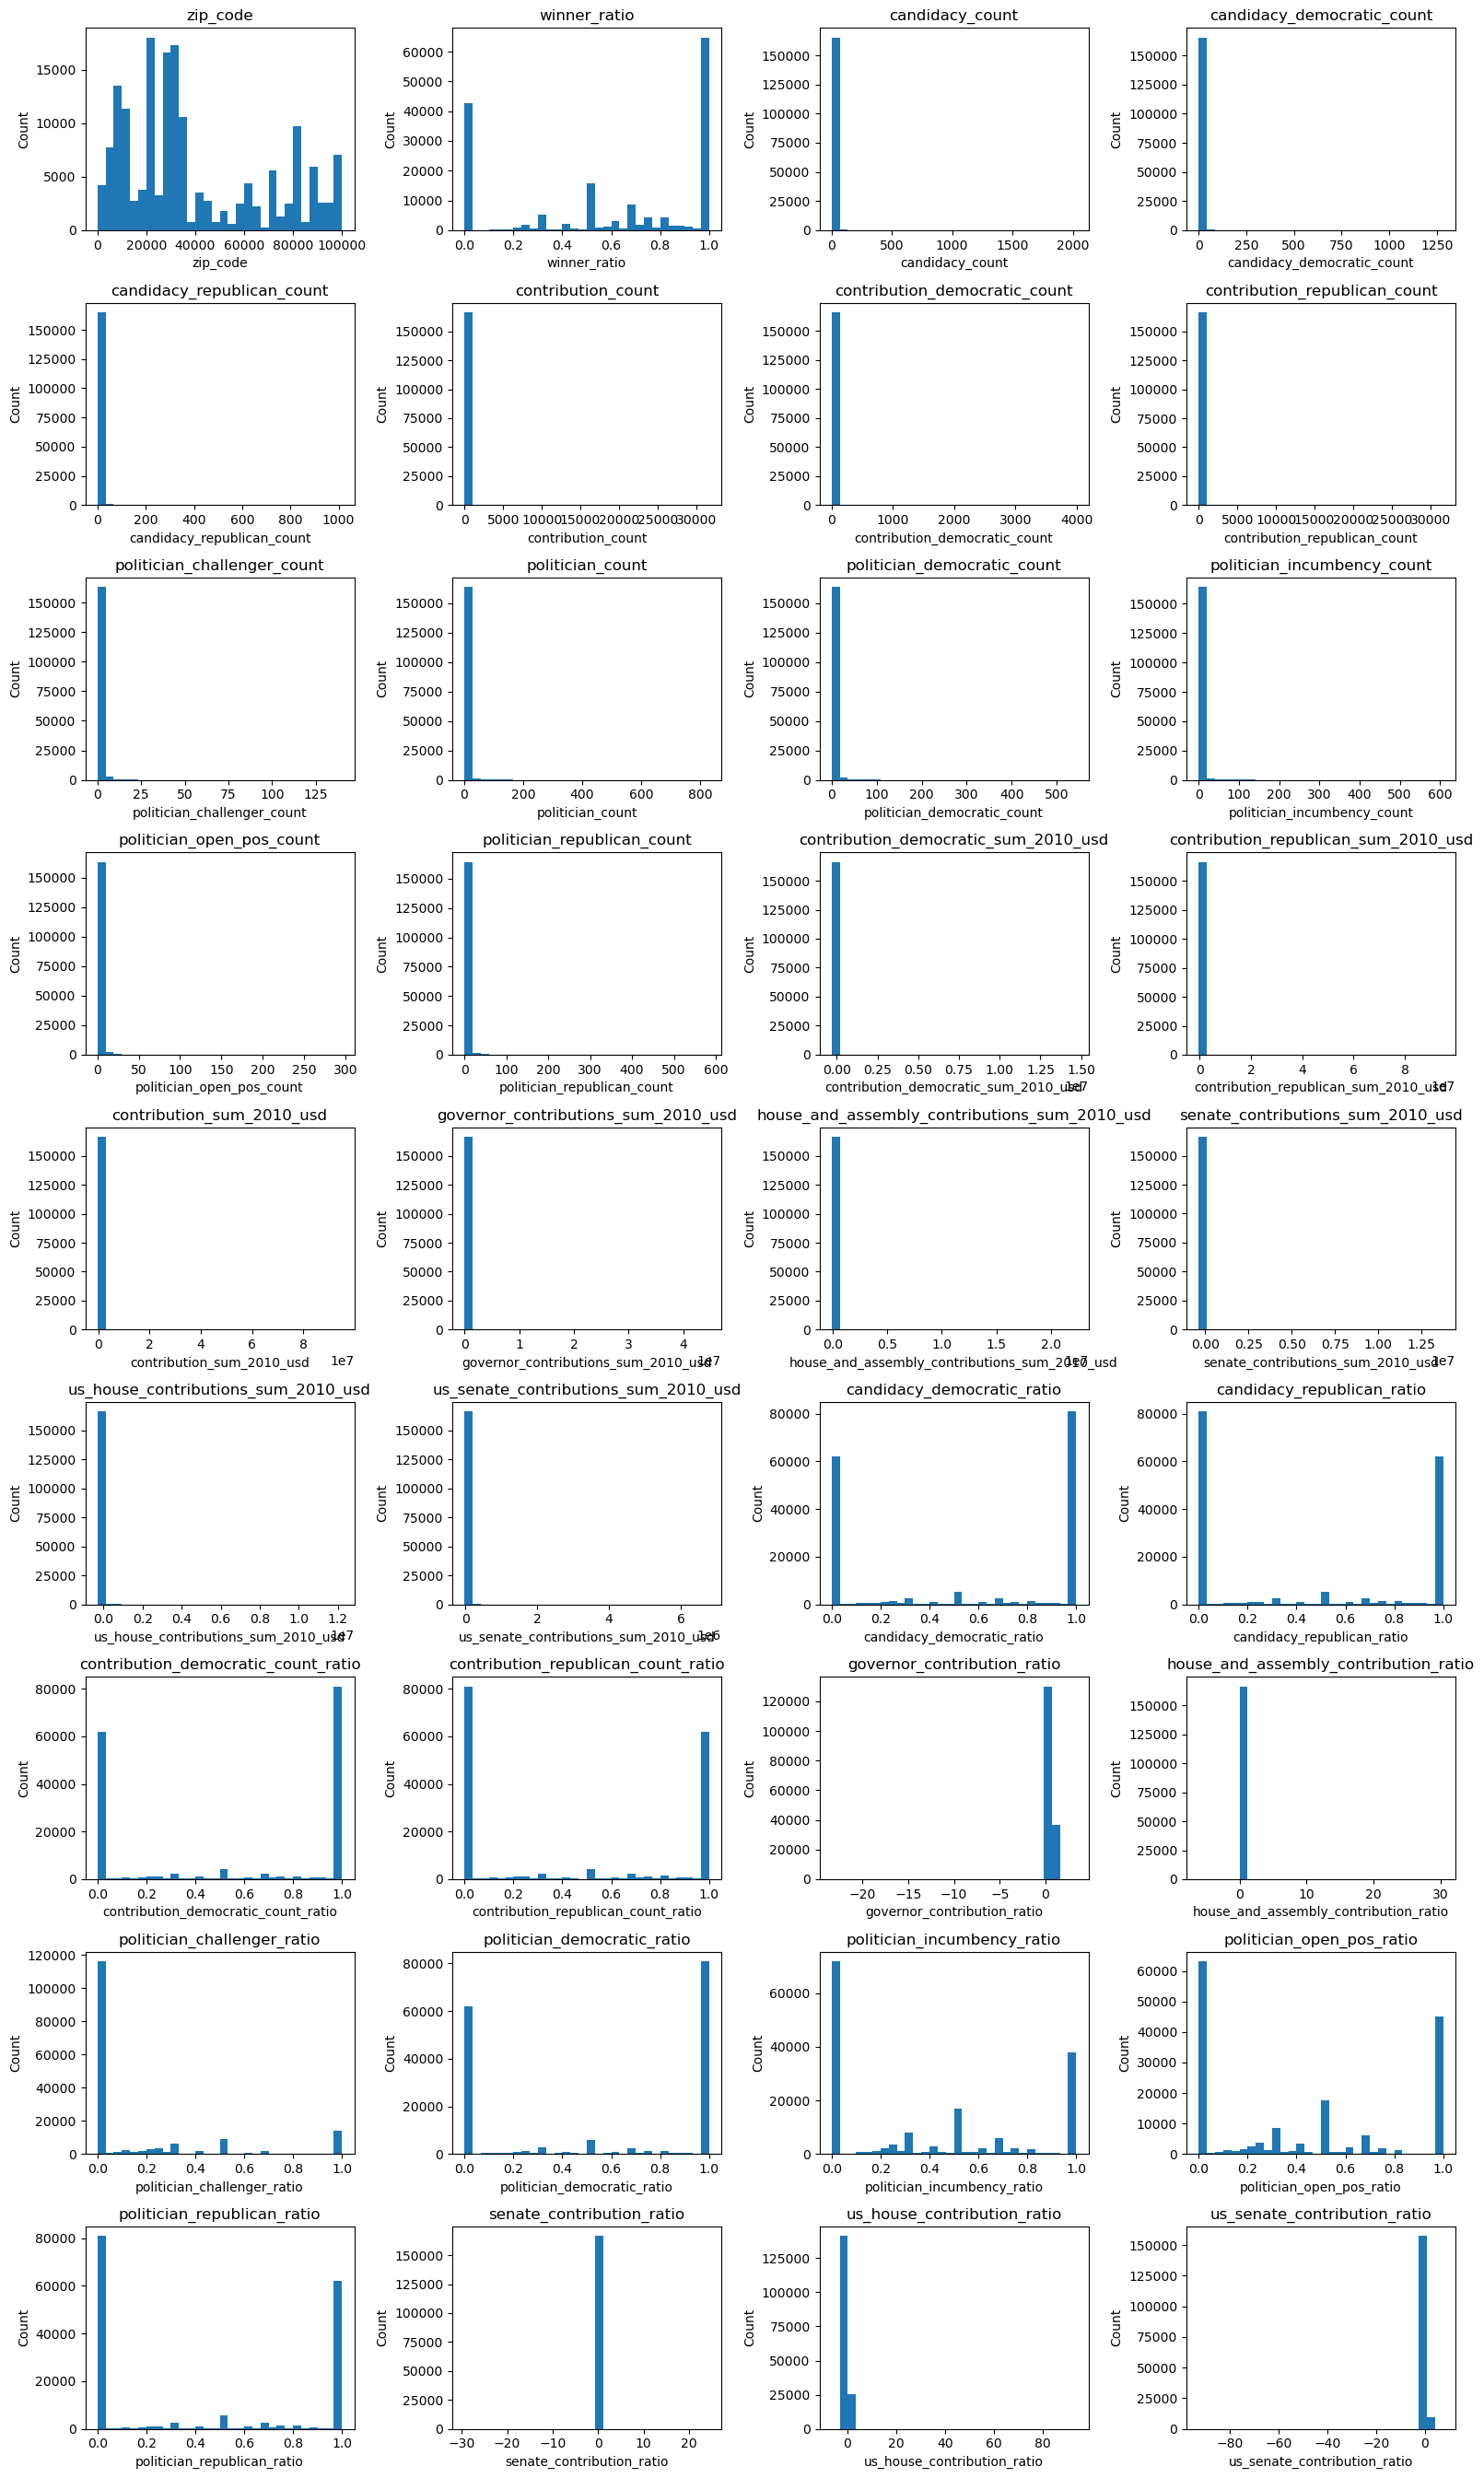

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Grab your numeric columns
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
n = len(numeric_cols)

# 2. Choose number of columns per row
ncols = 4
nrows = int(np.ceil(n / ncols))

# 3. Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows))
axes = axes.flatten()

# 4. Loop and plot
for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    data = train[col].dropna()
    ax.hist(data, bins=30)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# 5. Remove any extra axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [99]:
train.drop(columns=['zip_code'], inplace=True)  # drop ZIP 


### TESTING LABEL ENCODING to state_city and all other catogoricals:

In [81]:
from sklearn.preprocessing import LabelEncoder

# 1. First, create your combined state_city
train['state_city'] = train['state'] + '_' + train['city']

# 2. Group Top 50 + Other for state_city
top_n = 50
freq = train['state_city'].value_counts()
top_cities = freq.nlargest(top_n).index

train['state_city_grp'] = train['state_city'].where(
    train['state_city'].isin(top_cities),
    'Other'
)

# 3. Label Encode state_city_grp
le_city = LabelEncoder()
train['state_city_le'] = le_city.fit_transform(train['state_city_grp'])

# 4. Label Encode all other categoricals
cat_cols = ['general_sector', 'specific_sector', 'contributor_type']

for col in cat_cols:
    le = LabelEncoder()
    train[col + '_le'] = le.fit_transform(train[col])

# 5. Drop original string columns
train.drop(columns=['state', 'city', 'state_city', 'state_city_grp'] + cat_cols, inplace=True)

# ✅ Now you have all categoricals turned into numeric columns:
# - state_city_le
# - general_sector_le
# - specific_sector_le
# - contributor_type_le


In [82]:
# # 2) Create the composite state_city
# train['state_city'] = train['state'] + '_' + train['city']
# #drop the original columns
# train.drop(columns=['state', 'city'], inplace=True)

# # # 3) Compute frequency encoding (proportion of rows)
# # freq = (
# #     train['state_city']
# #     .value_counts(normalize=True)
# #     .rename('state_city_freq')
# # )

# # # 4) Map it back into train
# # train = train.join(freq, on='state_city')

# # #5)drop the raw string
# # # train.drop(columns=['state_city'], inplace=True)

### Binning the state-city freq column
I kept the state_city column from above, below encoding does apply frew internally.

In [83]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder

# # 1) Parameters
# tol          = 0.01   # group everything <1% frequency
# n_categories = 20     # also keep the top‑20 most frequent labels
# other_label  = 'Other'

# # 2) Compute relative frequencies
# freq = train['state_city'].value_counts(normalize=True)

# # 3) Find labels to keep
# keep_by_tol = set(freq[freq >= tol].index)
# keep_by_top = set(freq.nlargest(n_categories).index)
# keep_labels = keep_by_tol.union(keep_by_top)

# # 4) Create grouped column
# train['state_city_grp'] = train['state_city'].where(
#     train['state_city'].isin(keep_labels),
#     other_label
# )



# # 5) One‑hot encode the grouped column
# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# ohe_array = ohe.fit_transform(train[['state_city_grp']])

# # 6) Build a DataFrame of the dummies
# ohe_cols = ohe.get_feature_names_out(['state_city_grp'])
# state_city_ohe = pd.DataFrame(ohe_array, columns=ohe_cols, index=train.index)

# # 7) Attach & clean up
# train = pd.concat([train, state_city_ohe], axis=1)
# train.drop(columns=['state_city', 'state_city_grp'], inplace=True)

# # Now `train` has dummy columns:
# #   state_city_grp_{label}  for each kept label + 1 for Other
# # which you can include directly in your modeling pipeline.
# # 8) Check the result
# train.head()

### Assigning target and other col's

In [84]:
# # Create a flag column for each: 1 if negative, else 0
# for c in cols_with_negatives:
#     flag_col = c + '_neg_flag'
#     train[flag_col] = (train[c] < 0).astype(int)

In [85]:
TARGET = 'winner_ratio'

# After you built and joined the one-hot encoded state_city features
all_features = [c for c in train.columns if c != TARGET]

# Categorical columns = only the other raw string features
# cat_cols = ['general_sector', 'specific_sector', 'contributor_type']

# Numeric columns = everything else
num_cols = [c for c in all_features if c not in cat_cols]


In [68]:
train.head()

,winner_ratio,candidacy_count,candidacy_democratic_count,candidacy_republican_count,contribution_count,contribution_democratic_count,contribution_republican_count,politician_challenger_count,politician_count,politician_democratic_count,...,governor_contributions_sum_2010_usd_neg_flag,house_and_assembly_contributions_sum_2010_usd_neg_flag,senate_contributions_sum_2010_usd_neg_flag,us_house_contributions_sum_2010_usd_neg_flag,us_senate_contributions_sum_2010_usd_neg_flag,governor_contribution_ratio_neg_flag,house_and_assembly_contribution_ratio_neg_flag,senate_contribution_ratio_neg_flag,us_house_contribution_ratio_neg_flag,us_senate_contribution_ratio_neg_flag
0,1.0,4,4,0,6,6,0,0,4,4,...,0,0,0,0,0,0,0,0,0,0
1,0.5,2,2,0,2,2,0,1,2,2,...,0,0,0,0,0,0,0,0,0,0
3,1.0,4,4,0,4,4,0,0,4,4,...,0,0,0,0,0,0,0,0,0,0
4,0.0,4,4,0,6,6,0,2,4,4,...,0,0,0,0,0,0,0,0,0,0
5,1.0,2,2,0,4,4,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# 1. Features to use
feature_cols = [
    'candidacy_count', 
    'candidacy_democratic_count', 
    'candidacy_republican_count', 
    'contribution_count',
    'contribution_democratic_count', 
    'contribution_republican_count', 
    'politician_challenger_count', 
    'politician_count',
    'politician_democratic_count',
    'politician_republican_count',
    'contribution_sum_2010_usd',
    'contribution_democratic_sum_2010_usd',
    'contribution_republican_sum_2010_usd',
    'governor_contributions_sum_2010_usd',
    'house_and_assembly_contributions_sum_2010_usd',
    'senate_contributions_sum_2010_usd',
    'us_house_contributions_sum_2010_usd',
    'us_senate_contributions_sum_2010_usd',
    'candidacy_democratic_ratio',
    'candidacy_republican_ratio',
    'contribution_democratic_count_ratio',
    'contribution_republican_count_ratio',
    'governor_contribution_ratio',
    'house_and_assembly_contribution_ratio',
    'senate_contribution_ratio',
    'us_house_contribution_ratio',
    'us_senate_contribution_ratio',
    # flags (all neg_flag columns)
    # 'contribution_democratic_sum_2010_usd_neg_flag',
    # 'contribution_republican_sum_2010_usd_neg_flag',
    # 'contribution_sum_2010_usd_neg_flag',
    # 'governor_contributions_sum_2010_usd_neg_flag',
    # 'house_and_assembly_contributions_sum_2010_usd_neg_flag',
    # 'senate_contributions_sum_2010_usd_neg_flag',
    # 'us_house_contributions_sum_2010_usd_neg_flag',
    # 'us_senate_contributions_sum_2010_usd_neg_flag',
    # 'governor_contribution_ratio_neg_flag',
    # 'house_and_assembly_contribution_ratio_neg_flag',
    # 'senate_contribution_ratio_neg_flag',
    # 'us_house_contribution_ratio_neg_flag',
    # 'us_senate_contribution_ratio_neg_flag',
    # newly label-encoded categoricals
    'state_city_le',
    'general_sector_le',
    'specific_sector_le',
    'contributor_type_le'
]


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# 1. Select X and y
X = train[feature_cols]
y = train['winner_ratio']

# 2. Train/val split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Clip target
eps = 1e-4
y_train = np.clip(y_train, eps, 1 - eps)
y_val   = np.clip(y_val, eps, 1 - eps)

# 4. Define logit transform
forward_logit = lambda y: np.log((y + eps) / (1 - y + eps))
inverse_logit = lambda z: (1 / (1 + np.exp(-z)) - eps) / (1 - 2*eps)

logit_tf = FunctionTransformer(
    func=forward_logit,
    inverse_func=inverse_logit,
    validate=False
)

# 5. Random Forest
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)

# 6. Wrap with TransformedTargetRegressor
ttr_rf = TransformedTargetRegressor(
    regressor=rf,
    transformer=logit_tf
)

# 7. Fit
ttr_rf.fit(X_train, y_train)

# 8. Predict
y_val_pred_rf = ttr_rf.predict(X_val)

# 9. Evaluate
from sklearn.metrics import mean_squared_error

print("Validation MSE:", mean_squared_error(y_val, y_val_pred_rf))


/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/sklearn/compose/_target.py:210: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn(


Validation MSE: 0.14485844320429103


In [20]:
# 4. Split numeric into skewed (>1) vs ratio (≤1)
skewed_feats = [c for c in num_cols if train[c].max() > 1]

# 1. Identify your flag columns explicitly
flag_feats = [c for c in train.columns if c.endswith('_neg_flag')]

# 2. Re‑split your numeric lists
#    skewed_feats stays the same (those >1 before)
#    ratio_feats now only holds the true [0,1] ratio features
ratio_feats = [
    c for c in num_cols 
    if (train[c].max() <= 1) and (c not in flag_feats)
]
ratio_feats = [c for c in num_cols if train[c].max() <= 1]


### Pre-Processing Pipeline

In [21]:
# 7. Build preprocessing pipelines
# 7a. Clip negatives to zero → log1p → scale
skew_pipe = Pipeline([
    ('clip0', FunctionTransformer(lambda X: np.clip(X, 0, None), validate=False)),
    ('log1p', FunctionTransformer(np.log1p,           validate=False)),
    ('scale', StandardScaler())
])

# 7b. Scale the [0,1] features (ratios + flags)
ratio_pipe = Pipeline([
    ('scale', StandardScaler())
])
# we leave flags as-is
flag_pipe = 'passthrough'      

cat_pipe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('skew',  skew_pipe,   skewed_feats),
    ('ratio', ratio_pipe,  ratio_feats),
    ('flag',  flag_pipe,   flag_feats),
    ('cats',  cat_pipe,    cat_cols)
])

### Modeling Pipeline:

In [23]:
model = Pipeline([
    ('preproc', preprocessor),
    ('xgb', XGBRegressor(
        objective='reg:squarederror',
        eval_metric='rmse',
        n_estimators=1000,
        learning_rate=0.01
    ))
])



# 7. Train/validation split
X = train[all_features]
y = train[TARGET]
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)



###########################################
#LOG AND SIGMOID TRANSFORMATIONS
# import numpy as np
# from sklearn.compose import TransformedTargetRegressor
# from sklearn.preprocessing import FunctionTransformer

# # ── 1) Define a “logit” transformer with a tiny ε to avoid 0/0 or 1/0 ──
# eps = 1e-6
# logit_tf = FunctionTransformer(
#     func     = lambda y:  np.log((y + eps) / (1 - y + eps)),
#     inverse_func = lambda y: 1 / (1 + np.exp(-y)),
#     validate=False
# )

# # ── 2) Wrap your pipeline in TransformedTargetRegressor ──
# ttr = TransformedTargetRegressor(
#     regressor = model,    # your Pipeline from before
#     transformer = logit_tf
#)





In [24]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Epsilon to avoid 0/1 extremes
eps = 1e-4

# logit and inverse logit
forward_logit  = lambda y: np.log((y + eps) / (1 - y + eps))
inverse_logit  = lambda z: (1 / (1 + np.exp(-z)) - eps) / (1 - 2*eps)

# Wrap into pipeline: logit → standardize
target_transform = Pipeline([
    ('logit', FunctionTransformer(forward_logit, inverse_func=inverse_logit, validate=False)),
    ('scale', StandardScaler())
])

# Wrap the main model
ttr = TransformedTargetRegressor(
    regressor=model,
    transformer=target_transform
)


### Run and Evaluate Model:

In [25]:
# LOGIT TRANSFORMATION MODEL RUN:
# Step3 : clip y_train and y_val
y_train = np.clip(y_train, eps, 1 - eps)
y_val   = np.clip(y_val, eps, 1 - eps)

# Step 4: Fit!
ttr.fit(X_train, y_train)

# Step 5: Predict
y_val_pred = ttr.predict(X_val)

# Step 6: Evaluate
from sklearn.metrics import mean_squared_error
print("Validation MSE:", mean_squared_error(y_val, y_val_pred))

/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/sklearn/compose/_target.py:210: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn(


Validation MSE: 0.1246300193093432


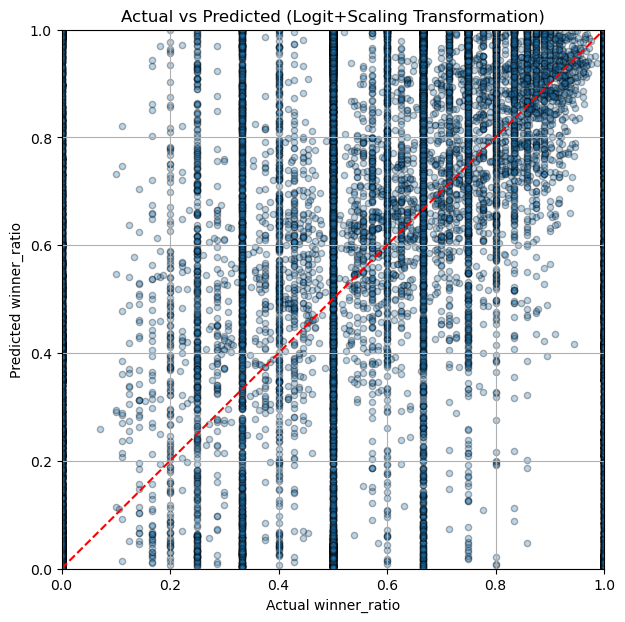

In [26]:
import matplotlib.pyplot as plt

def plot_actual_vs_pred(y_true, y_pred, title="Actual vs Predicted"):
    plt.figure(figsize=(7, 7))
    plt.scatter(y_true, y_pred, alpha=0.3, edgecolors='k', s=20)
    plt.plot([0, 1], [0, 1], 'r--')  # 45-degree perfect prediction line
    plt.xlabel('Actual winner_ratio')
    plt.ylabel('Predicted winner_ratio')
    plt.title(title)
    plt.grid(True)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

# Usage example after you predict:
# Assume you just did:
y_val_pred = ttr.predict(X_val)

plot_actual_vs_pred(y_val, y_val_pred, title="Actual vs Predicted (Logit+Scaling Transformation)")


### RF MODEL:

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer, StandardScaler
import numpy as np

# 1) Define Random Forest model
rf_model = Pipeline([
    ('preproc', preprocessor),
    ('rf', RandomForestRegressor(
        n_estimators=500,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=4,
        random_state=42,
        n_jobs=-1
    ))
])

# 2) Define logit + scaling transformation (same as before)
eps = 1e-4

forward_logit = lambda y: np.log((y + eps) / (1 - y + eps))
inverse_logit = lambda z: (1 / (1 + np.exp(-z)) - eps) / (1 - 2*eps)

target_transform = Pipeline([
    ('logit', FunctionTransformer(forward_logit, inverse_func=inverse_logit, validate=False)),
    ('scale', StandardScaler())
])

# 3) Wrap it inside TransformedTargetRegressor
ttr_rf = TransformedTargetRegressor(
    regressor=rf_model,
    transformer=target_transform
)

# 4) Clip target as before
y_train = np.clip(y_train, eps, 1 - eps)
y_val   = np.clip(y_val, eps, 1 - eps)

# 5) Fit Random Forest
ttr_rf.fit(X_train, y_train)

# 6) Predict
y_val_pred_rf = ttr_rf.predict(X_val)

# 7) Evaluate
from sklearn.metrics import mean_squared_error
print("Random Forest Validation MSE:", mean_squared_error(y_val, y_val_pred_rf))


/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/sklearn/compose/_target.py:210: UserWarning: The provided functions or transformer are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'
  warnings.warn(


Random Forest Validation MSE: 0.1165460897375996


         feature  importance
31    feature_31    0.506310
29    feature_29    0.082757
12    feature_12    0.046413
14    feature_14    0.044638
15    feature_15    0.029896
13    feature_13    0.027996
20    feature_20    0.024819
23    feature_23    0.018127
17    feature_17    0.013798
16    feature_16    0.013028
32    feature_32    0.012287
4      feature_4    0.010409
3      feature_3    0.010320
10    feature_10    0.009931
608  feature_608    0.009770
209  feature_209    0.009224
21    feature_21    0.009047
18    feature_18    0.008452
19    feature_19    0.006981
22    feature_22    0.006273


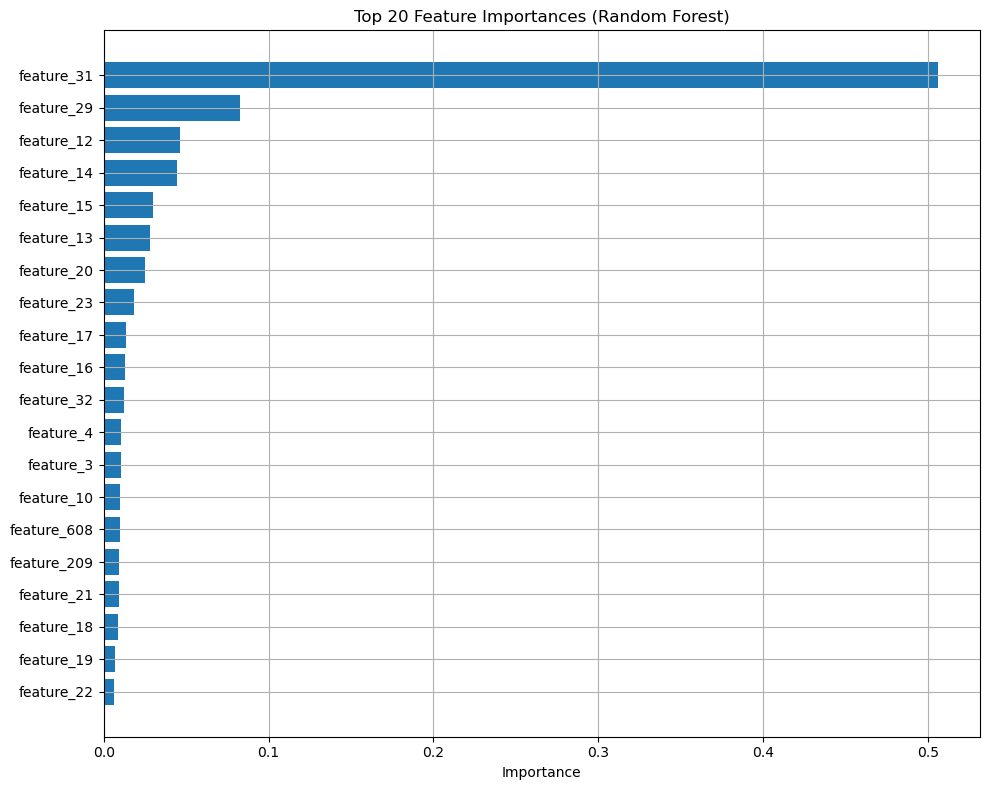

In [34]:
importances = rf_model_fitted.feature_importances_

# 1) Create dummy feature names matching the number of importances
feature_names = [f'feature_{i}' for i in range(len(importances))]

# 2) Build importance DataFrame
feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# 3) Sort
feat_imp_sorted = feat_imp.sort_values(by='importance', ascending=False)

# 4) Display top 20
print(feat_imp_sorted.head(20))

# 5) Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(feat_imp_sorted['feature'][:20][::-1], feat_imp_sorted['importance'][:20][::-1])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()


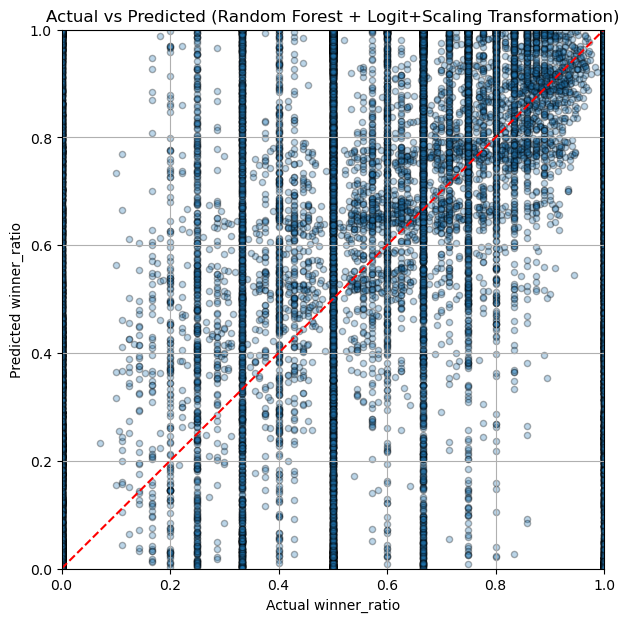

In [29]:
#plotting the actual vs predicted values:
plot_actual_vs_pred(y_val, y_val_pred_rf, title="Actual vs Predicted (Random Forest + Logit+Scaling Transformation)")

Blended Model Validation MSE: 0.11623153011918418


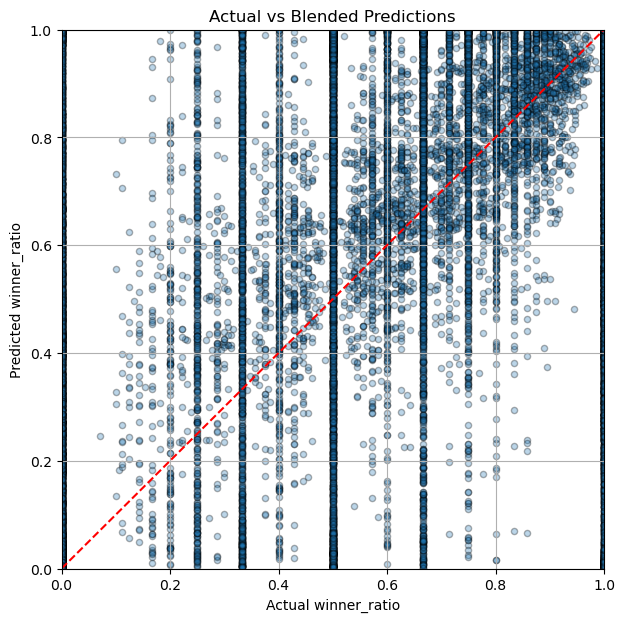

In [28]:
#BLENDING THEIR RESULTS:

# 1. Simple average ensemble
y_val_pred_blend = 0.5 * y_val_pred + 0.5 * y_val_pred_rf

# 2. Evaluate
from sklearn.metrics import mean_squared_error

blend_mse = mean_squared_error(y_val, y_val_pred_blend)

print("Blended Model Validation MSE:", blend_mse)
# 3. Plot actual vs blended predictions
plot_actual_vs_pred(y_val, y_val_pred_blend, title="Actual vs Blended Predictions")
# 4. Save the blended model predictions

In [36]:
# Manually select known strong columns
important_features = [
    'contribution_sum_2010_usd',
    'candidacy_count',
    'contribution_count',
    'politician_count',
    'contribution_democratic_sum_2010_usd',
    'contribution_republican_sum_2010_usd',
    'house_and_assembly_contributions_sum_2010_usd',
    'senate_contributions_sum_2010_usd',
    'us_house_contributions_sum_2010_usd',
    'us_senate_contributions_sum_2010_usd',
    'candidacy_republican_ratio',
    'contribution_republican_count_ratio',
    'politician_republican_ratio',
    'politician_challenger_ratio',
    'politician_open_pos_ratio',
    'state_city_grp_CA_Los Angeles',   # OHE important cities
    'state_city_grp_NY_New York',
    'state_city_grp_TX_Houston',
    'state_city_grp_FL_Miami',
    'state_city_grp_Other'
]

X_train_top20 = X_train[important_features]
X_val_top20   = X_val[important_features]


KeyError: "['state_city_grp_CA_Los Angeles', 'state_city_grp_NY_New York', 'state_city_grp_TX_Houston', 'state_city_grp_FL_Miami'] not in index"

In [ ]:
# # 2. Predict on TRAIN
# y_train_pred = model.predict(X_train)
# train_mse = mean_squared_error(y_train, y_train_pred)

# # 3. Predict on VAL
# y_val_pred = model.predict(X_val)
# val_mse = mean_squared_error(y_val, y_val_pred)

# print(f"Train MSE: {train_mse:.6f}")
# print(f"Val   MSE: {val_mse:.6f}")

Train MSE: 0.087352
Val   MSE: 0.090445


### Plotting Results:

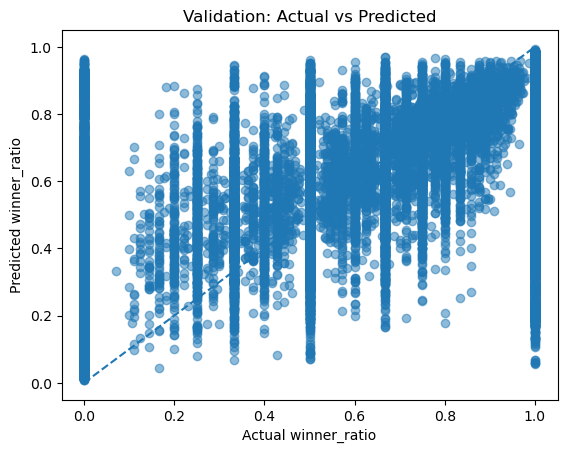

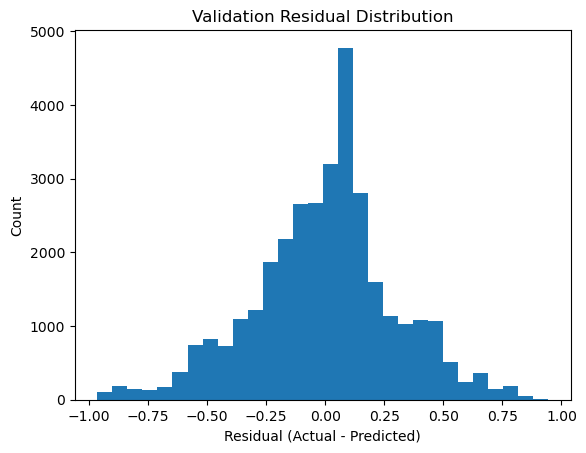

In [65]:
import matplotlib.pyplot as plt

# Assuming the model is already fitted and X_train, X_val, y_train, y_val are defined
# # Compute predictions
# y_train_pred = model.predict(X_train)
# y_val_pred = model.predict(X_val)

# 1) Scatter plot: Actual vs Predicted on Validation Set
plt.figure()
plt.scatter(y_val, y_val_pred, alpha=0.5)
min_val = min(y_val.min(), y_val_pred.min())
max_val = max(y_val.max(), y_val_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.xlabel('Actual winner_ratio')
plt.ylabel('Predicted winner_ratio')
plt.title('Validation: Actual vs Predicted')
plt.show()

# 2) Residuals distribution on Validation Set
residuals = y_val - y_val_pred
plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Count')
plt.title('Validation Residual Distribution')
plt.show()


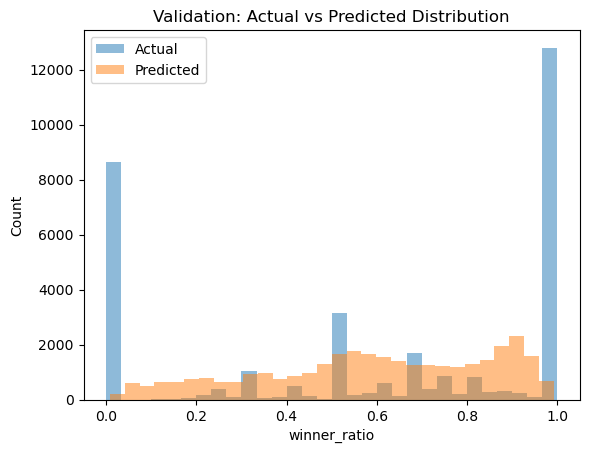

In [68]:
plt.figure()
plt.hist(y_val, bins=30, alpha=0.5, label='Actual')
plt.hist(y_val_pred, bins=30, alpha=0.5, label='Predicted')
plt.xlabel('winner_ratio')
plt.ylabel('Count')
plt.title('Validation: Actual vs Predicted Distribution')
plt.legend()
plt.show()


**********

In [69]:
# from skimpy import skim
# pd.set_option('display.max_columns',None) 
# pd.set_option('display.max_rows',800)

In [70]:
# skim(train)

In [204]:
from scipy.stats import skew, kurtosis

# ------------------------------------------------------------------
# 2 · Compute skewness and (excess) kurtosis
# ------------------------------------------------------------------
stats = pd.DataFrame(index=num_vars, columns=["skew", "kurtosis"])

for col in num_vars:
    stats.loc[col, "skew"]     = skew(train[col].dropna())          # Fisher‐Pearson
    stats.loc[col, "kurtosis"] = kurtosis(train[col].dropna())      # excess kurtosis (0 = normal tail)

stats = stats.astype(float)

# ------------------------------------------------------------------
# 3 · Flag problematic variables
# ------------------------------------------------------------------
stats["|skew|>1"]   = stats["skew"].abs() > 1
stats["kurt>3"]     = stats["kurtosis"]  > 3

# sort by absolute skew so big offenders float to the top
stats_sorted = stats.reindex(stats["skew"].abs().sort_values(ascending=False).index)

# ------------------------------------------------------------------
# 4 · Show a concise table
# ------------------------------------------------------------------
pd.set_option("display.float_format", "{:,.3f}".format)   # tidy printing
display(stats_sorted.head(25))   # top 25 most‑skewed — adjust as needed


,skew,kurtosis,|skew|>1,kurt>3
contribution_republican_count,338.338,"129,705.180",True,True
governor_contributions_sum_2010_usd,331.451,"121,902.707",True,True
contribution_republican_sum_2010_usd,306.665,"104,259.740",True,True
contribution_sum_2010_usd,257.742,"81,405.826",True,True
contribution_count,237.277,"78,294.753",True,True
senate_contributions_sum_2010_usd,225.814,"61,782.461",True,True
house_and_assembly_contributions_sum_2010_usd,214.976,"51,088.230",True,True
us_senate_contributions_sum_2010_usd,157.389,"33,014.224",True,True
contribution_democratic_sum_2010_usd,98.328,"13,154.039",True,True
us_house_contributions_sum_2010_usd,79.699,"9,329.690",True,True


In [205]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize

# ------------------------------------------------------------
# 0.  Lists from above skew table
# ------------------------------------------------------------
money_like = [
    'contribution_republican_sum_2010_usd','governor_contributions_sum_2010_usd',
    'contribution_republican_sum_2010_usd','contribution_sum_2010_usd',
    'senate_contributions_sum_2010_usd','house_and_assembly_contributions_sum_2010_usd',
    'us_senate_contributions_sum_2010_usd','contribution_democratic_sum_2010_usd',
    'us_house_contributions_sum_2010_usd'
]

count_like = [
    'contribution_republican_count','contribution_count',
    'contribution_democratic_count','candidacy_democratic_count',
    'candidacy_republican_count','candidacy_count',
    'politician_open_pos_count','politician_republican_count',
    'politician_incumbency_count','politician_democratic_count',
    'politician_count','politician_challenger_count'
]

ratio_like = [
    'us_senate_contribution_ratio','us_house_contribution_ratio',
    'politician_challenger_ratio','senate_contribution_ratio','state_all_comm'
]

# ------------------------------------------------------------
# 1.  log1p transform for money & count cols
# ------------------------------------------------------------
for col in money_like + count_like:
    if col in train.columns:           # guard against typos / dropped cols
        train[col] = np.log1p(train[col].clip(lower=0))
        # test[col]  = np.log1p(test[col].clip(lower=0))

# ------------------------------------------------------------
# 2.  Yeo‑Johnson power transform for skewed ratios
# ------------------------------------------------------------
pt = PowerTransformer(method="yeo-johnson", standardize=False)
train[ratio_like] = pt.fit_transform(train[ratio_like])
# test[ratio_like]  = pt.transform(test[ratio_like])

# ------------------------------------------------------------
# 3.  Winsorise: clip any extreme 1 % tails on ALL numeric cols
# ------------------------------------------------------------
numeric_cols = train.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    lo, hi = np.percentile(train[col], [1, 99])
    train[col] = train[col].clip(lo, hi)
    # test[col]  = test[col].clip(lo, hi)

print("✅  Skew & kurtosis treatments applied.")


✅  Skew & kurtosis treatments applied.


In [206]:
from scipy.stats import skew, kurtosis

# ------------------------------------------------------------------
# 2 · Compute skewness and (excess) kurtosis
# ------------------------------------------------------------------
stats = pd.DataFrame(index=num_vars, columns=["skew", "kurtosis"])

for col in num_vars:
    stats.loc[col, "skew"]     = skew(train[col].dropna())          # Fisher‐Pearson
    stats.loc[col, "kurtosis"] = kurtosis(train[col].dropna())      # excess kurtosis (0 = normal tail)

stats = stats.astype(float)

# ------------------------------------------------------------------
# 3 · Flag problematic variables
# ------------------------------------------------------------------
stats["|skew|>1"]   = stats["skew"].abs() > 1
stats["kurt>3"]     = stats["kurtosis"]  > 3

# sort by absolute skew so big offenders float to the top
stats_sorted = stats.reindex(stats["skew"].abs().sort_values(ascending=False).index)

# ------------------------------------------------------------------
# 4 · Show a concise table
# ------------------------------------------------------------------
pd.set_option("display.float_format", "{:,.3f}".format)   # tidy printing
display(stats_sorted.head(25))   # top 25 most‑skewed — adjust as needed


,skew,kurtosis,|skew|>1,kurt>3
us_senate_contributions_sum_2010_usd,2.310,3.666,True,True
us_senate_contribution_ratio,2.143,2.635,True,False
politician_count,2.067,4.396,True,True
us_house_contributions_sum_2010_usd,2.065,2.615,True,False
candidacy_count,1.953,3.878,True,True
us_house_contribution_ratio,1.864,1.503,True,False
contribution_count,1.514,2.077,True,False
politician_challenger_count,1.372,0.743,True,False
state_win_comm,1.251,0.594,True,False
senate_contributions_sum_2010_usd,1.185,-0.294,True,False


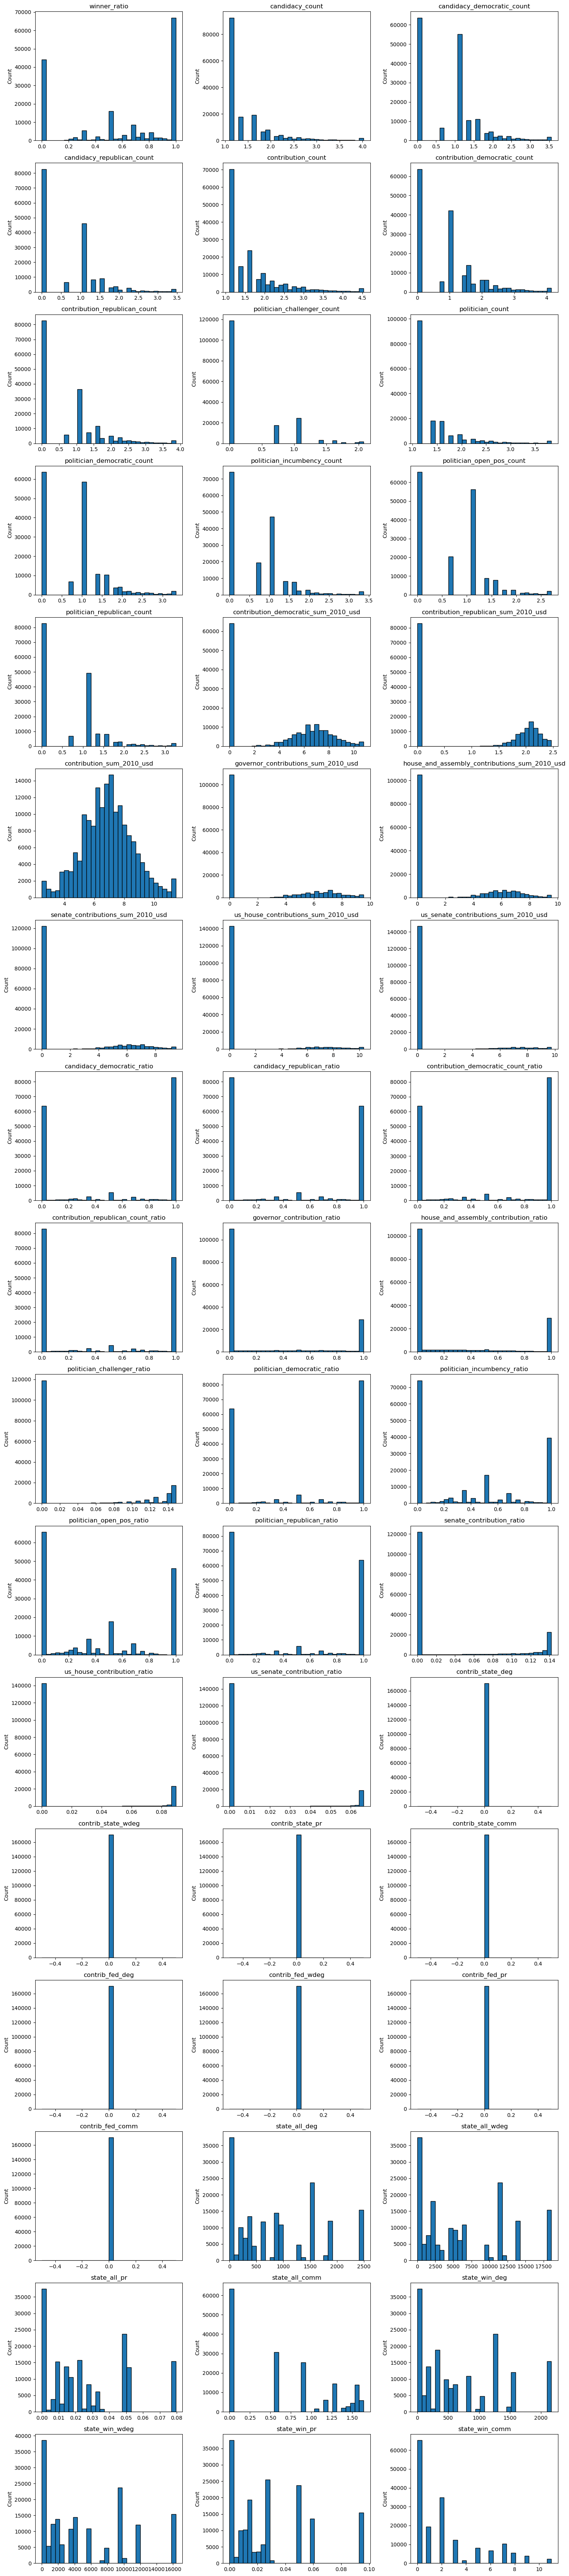

In [207]:
import matplotlib.pyplot as plt

def plot_histograms(df, num_vars, bins=30, cols=3, figsize=(15, 4)):
    n = len(num_vars)
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows))
    axes = axes.flatten()
    
    for ax, col in zip(axes, num_vars):
        ax.hist(df[col].dropna(), bins=bins, edgecolor='black')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('Count')
    
    # remove any unused subplots
    for ax in axes[n:]:
        fig.delaxes(ax)
    
    plt.tight_layout()
    plt.show()

plot_histograms(train, num_vars)


In [203]:
train[cat_vars].describe()

,zip_code
count,170431.000000
mean,38173.100064
std,29014.375320
min,0.000000
25%,14626.000000
50%,30031.000000
75%,61081.000000
max,99999.000000


In [71]:
for col in cat_vars:
    print(train[col].value_counts())
    print("#########")

general_sector
Uncoded                        40348
Lawyers & Lobbyists            29164
Retired                        21350
Health Professionals            7896
No Employer Listed or Found     7828
                               ...  
Miscellaneous Health               3
Right to Die                       2
Term Limits                        1
Commodity Brokers & Dealers        1
Wise Use                           1
Name: count, Length: 135, dtype: int64
#########
city
WASHINGTON       5692
NEW YORK         3618
DENVER           2331
ALBUQUERQUE      2280
MIAMI            1927
                 ... 
MOUNT SOLON         1
CARL JUNCTION       1
GAYSVILLE           1
ORDINARY            1
LACASSINE           1
Name: count, Length: 8836, dtype: int64
#########


KeyError: 'zip_code'

In [166]:


# ------------------------------------------------------------------
#  CLIP & LOG‑TRANSFORM HEAVY‑TAILED $ FIELDS
# ------------------------------------------------------------------
# (ensure non‑negative first – you already fixed negatives earlier)
money_cols = [c for c in train.columns if c.endswith("_usd")]

for c in money_cols:
    train[c] = np.log1p(train[c].clip(lower=0))


In [167]:
import numpy as np
import pandas as pd
from category_encoders import TargetEncoder

# ------------------------------------------------------------------
# 1.  PARAMETERS
# ------------------------------------------------------------------
TOP_GENERAL   = 25
TOP_SPECIFIC  = 100
STATE_MIN     = 200          # states with <200 rows → OTHER
TE_SMOOTHING  = 10           # strength of shrinkage in TargetEncoder

cat_top_lump  = {
    "general_sector"  : (TOP_GENERAL,  "Other_Sector"),
    "specific_sector" : (TOP_SPECIFIC, "Other_Specific"),
}

# ------------------------------------------------------------------
# 2.  HELPER FUNCTIONS
# ------------------------------------------------------------------
def lump_by_top(df, col, top_n, new_label):
    top_vals = df[col].value_counts().nlargest(top_n).index
    df[col]  = df[col].where(df[col].isin(top_vals), new_label)
    return df

def lump_by_min(df, col, min_cnt, new_label):
    small = df[col].value_counts()[lambda s: s < min_cnt].index
    df[col] = df[col].where(~df[col].isin(small), new_label)
    return df

# ------------------------------------------------------------------
# 3.  APPLY LUMPING (***train and test***)
# ------------------------------------------------------------------
for col, (top_n, label) in cat_top_lump.items():
    train = lump_by_top(train, col, top_n, label)
    # test  = lump_by_top(test,  col, top_n, label)   # ★ keep mapping identical

train = lump_by_min(train, "state", STATE_MIN, "OTHER")
# test  = lump_by_min(test,  "state", STATE_MIN, "OTHER")

# ------------------------------------------------------------------
# 4.  TARGET ENCODING  (***fit on train, transform test***)
# ------------------------------------------------------------------
te_cols = ["general_sector", "specific_sector", "state"]
te      = TargetEncoder(cols=te_cols, smoothing=TE_SMOOTHING)

train[te_cols] = te.fit_transform(train[te_cols], train["winner_ratio"])
# test[te_cols]  = te.transform(test[te_cols])            # ★ no fit here

# ------------------------------------------------------------------
# 5  FREQUENCY‑ENCODE city and zip_code  (train‑fit, test‑transform)
# ------------------------------------------------------------------
for col in ["city", "zip_code"]:
    freq = (train[col].astype(str)      # ensure consistent dtype
                    .value_counts(normalize=True))   # share of total rows

    train[f"{col}_freq"] = train[col].astype(str).map(freq).fillna(0)
    # test[f"{col}_freq"]  = test[col].astype(str).map(freq).fillna(0)

# drop the raw string columns (high cardinality)
train.drop(columns=["city", "zip_code"], inplace=True)
# test.drop(columns=["city",  "zip_code"], inplace=True)


# ------------------------------------------------------------------
# 6.  HANDLE THE REMAINING SMALL CATEGORICALS WITH ONE‑HOT
# ------------------------------------------------------------------
cat_small = ["contributor_type"]      # only 3 levels
train = pd.get_dummies(train, columns=cat_small, drop_first=True)
# test  = pd.get_dummies(test,  columns=cat_small, drop_first=True)

# Keep column order identical in train & test after one‑hot:
# missing_cols = [c for c in train.columns if c not in test.columns]
# for c in missing_cols:
#     test[c] = 0
# test = test[train.columns.drop("winner_ratio")]         # align

print("✅  Pre‑processing finished. Shapes:", train.shape)
# print("✅  Pre‑processing finished. Shapes:",   test.shape)
   


✅  Pre‑processing finished. Shapes: (170431, 58)


In [180]:
for col in ["city", "zip_code","contributor_type"]:
    if col in cat_vars:
        cat_vars.remove(col)


In [181]:
cat_vars

['general_sector', 'specific_sector', 'state']

In [182]:
cat_vars

['general_sector', 'specific_sector', 'state']

In [183]:
train.columns

Index(['general_sector', 'specific_sector', 'state', 'winner_ratio',
       'candidacy_count', 'candidacy_democratic_count',
       'candidacy_republican_count', 'contribution_count',
       'contribution_democratic_count', 'contribution_republican_count',
       'politician_challenger_count', 'politician_count',
       'politician_democratic_count', 'politician_incumbency_count',
       'politician_open_pos_count', 'politician_republican_count',
       'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
    

In [184]:
for col in cat_vars:
    print(train[col].value_counts())
    print("#########")

general_sector
0.554041    41916
0.602974    29416
0.558129    21525
0.664147    20402
0.619791     8026
0.624253     7976
0.614648     7240
0.516620     4880
0.607878     3085
0.665205     2863
0.625238     2447
0.541885     2135
0.467179     1930
0.649326     1894
0.622656     1554
0.683258     1489
0.642347     1457
0.595600     1434
0.630844     1339
0.588926     1150
0.686802     1149
0.572157     1098
0.529244     1070
0.637109      992
0.688297      991
0.668889      973
Name: count, dtype: int64
#########
specific_sector
0.554041    41916
0.592262    26680
0.558129    21525
0.667235    12640
0.624253     7976
0.613234     3917
0.609821     3552
0.707021     2725
0.617217     2576
0.606914     2490
0.516992     2350
0.624505     2218
0.541885     2135
0.651481     1462
0.642347     1457
0.517960     1366
0.472515     1363
0.630844     1339
0.667621     1168
0.588926     1150
0.670808     1104
0.629943     1070
0.654479      918
0.547157      901
0.597810      879
0.623174      7

In [ ]:
# ------------------------------------------
# 0.  PREP
# ------------------------------------------
import numpy as np, pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# X  : all engineered features (numeric dataframe)
# y  : target
X = train.drop(columns=["winner_ratio"])
y = train["winner_ratio"].values.astype("float32")

# ------------------------------------------
# 1.  STANDARDISE  (fit only on train folds)
# ------------------------------------------
scaler = StandardScaler()

# ------------------------------------------
# 2.  MODEL BUILDER
# ------------------------------------------
def make_model(input_dim, hidden=[256,128,64], drop=0.20):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))
    for h in hidden:
        model.add(layers.Dense(h, activation="relu"))
        model.add(layers.Dropout(drop))
    model.add(layers.Dense(1, activation="sigmoid"))       # ⬅️ ensures 0‑1
    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="mse",                                        # Kaggle metric
        metrics=[],
    )
    return model

# ------------------------------------------
# 3.  K‑FOLD TRAINING
# ------------------------------------------
N_SPLITS = 5
BATCH    = 1024
EPOCHS   = 300

kf   = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
oof  = np.zeros(len(X))
pred = np.zeros(len(test))          # will accumulate test predictions

for fold, (tr_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"\n📂 Fold {fold}")

    # 3‑a  fit scaler on *training* rows only
    X_tr = scaler.fit_transform(X.iloc[tr_idx])
    X_va = scaler.transform(X.iloc[val_idx])

    # 3‑b  build / train
    net = make_model(X_tr.shape[1])
    es  = keras.callbacks.EarlyStopping(
            patience=20, restore_best_weights=True, verbose=0)
    net.fit(X_tr, y[tr_idx],
            validation_data=(X_va, y[val_idx]),
            epochs=EPOCHS, batch_size=BATCH,
            callbacks=[es], verbose=0)

    # 3‑c  out‑of‑fold preds & score
    oof[val_idx] = net.predict(X_va, batch_size=BATCH).squeeze()
    mse = mean_squared_error(y[val_idx], oof[val_idx])
    print(f"   fold {fold} MSE = {mse:.6f}")

    # 3‑d  test predictions (scale test once per fold)
    X_test_scaled = scaler.transform(test[X.columns])
    pred += net.predict(X_test_scaled, batch_size=BATCH).squeeze() / N_SPLITS

print("\n📈 CV  MSE  =", mean_squared_error(y, oof))

# ------------------------------------------
# 4.  SUBMISSION
# ------------------------------------------
sub = pd.DataFrame({"index": test.index, "winner_ratio": pred.clip(0,1)})
sub.to_csv("nn_sigmoid_submission.csv", index=False)
print("Submission saved: nn_sigmoid_submission.csv")


In [ ]:
# # Try a gradient‑boosting model built for categorical + numerical**<br> CatBoost 
# # (or LightGBM w/ categorical) usually wins on these “messy mix” tables. 
# # | Handles remaining categories natively, robust to skew, requires little tuning. 

# from catboost import CatBoostRegressor, Pool

# cat_cols = ["contributor_type"]           # now the only remaining string col
# train_pool = Pool(data=train.drop("winner_ratio", axis=1),
#                   label=train["winner_ratio"],
#                   cat_features=[train.columns.get_loc(c) for c in cat_cols])
# model = CatBoostRegressor(
#         depth=6, learning_rate=0.05, iterations=3000,
#         loss_function="RMSE", eval_metric="RMSE",
#         early_stopping_rounds=200, verbose=200)
# model.fit(train_pool, eval_set=train_pool)   # quick CV → use KFold for final